求极限

In [2]:
import sympy as sp 
x = sp.symbols('x')

print(sp.limit(sp.sin(x)/x, x, 0))
print(sp.limit(pow(1 + 1 / x, x), x, sp.oo))

1
E


求导数

In [4]:
import sympy as sp 
x, y = sp.symbols('x y')
z = sp.sin(x) + x**2 * sp.exp(y)
print('关于x的二阶偏导为: ', sp.diff(z, x, 2))
print('关于y的一阶偏导为: ', sp.diff(z, y)) 

关于x的二阶偏导为:  2*exp(y) - sin(x)
关于y的一阶偏导为:  x**2*exp(y)


In [5]:
# 级数的求和

import sympy as sp

k, n = sp.symbols('s n')
print(sp.summation(k ** 2, (k, 1, n)))
print(sp.factor(sp.summation(k**2, (k, 1, n)))) # 把结果进行因式分解
print(sp.summation(1/k**2, (k, 1, sp.oo)))

n**3/3 + n**2/2 + n/6
n*(n + 1)*(2*n + 1)/6
pi**2/6


泰勒展开

x + O(x**3)
x - x**3/6 + O(x**5)
x - x**3/6 + x**5/120 + O(x**7)


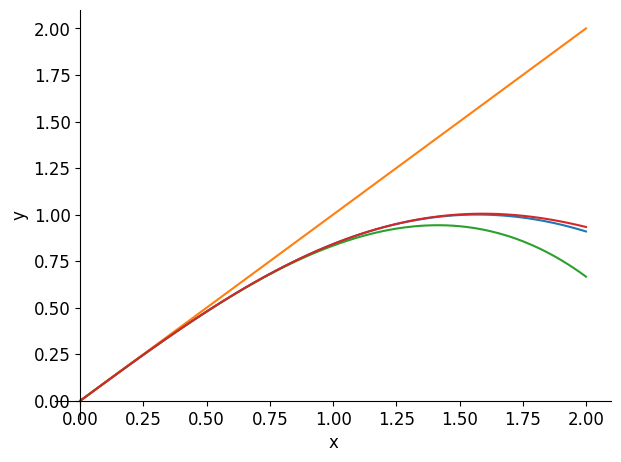

In [14]:
from pylab import rc
import sympy as sp
import sympy.plotting as plt

rc('font', size=12)

x = sp.symbols('x')
y = sp.sin(x)
for k in range(3, 8, 2):
    print(y.series(x, 0, k)) # 在x=0处的泰勒展开

plt.plot(y, sp.series(y, x, 0, 3).removeO(), sp.series(y, x, 0, 5).removeO(), 
         sp.series(y, x, 0, 7).removeO(), (x, 0, 2), xlabel='x', ylabel='y')


隐函数画图

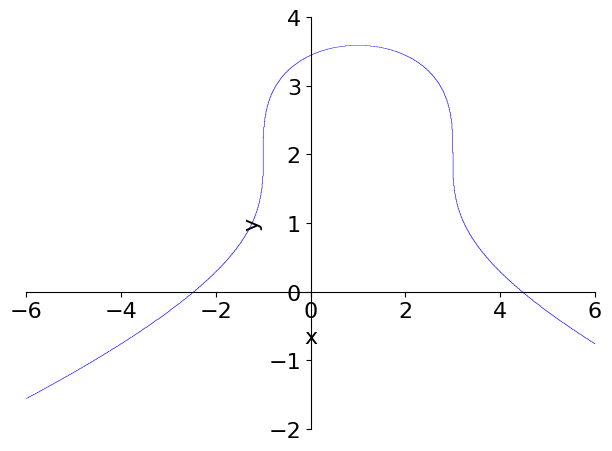

In [8]:
from pylab import rc 
from sympy import plot_implicit as pt, Eq 
from sympy.abc import x, y 

rc('font', size=16)
pt(Eq((x - 1)**2 + (y - 2)**3, 4), (x, -6, 6), (y, -2, 4), xlabel='x', ylabel='y')

符号三维曲面画图

In [15]:
# 定积分和不定积分
from sympy import integrate, symbols, sin, pi, oo 
from sympy.abc import x 

print(integrate(sin(2*x), (x, 0, pi)))
print(integrate(sin(2*x), (x, 0, oo)))

0
AccumBounds(0, 1)


In [19]:
# 求解代数方程(方程组)的符号解

from sympy import * 

x, y = symbols('x y')
print(solve(x**3-1))
print(solve((x - 2)**2*(x - 1)**3, x))
print(roots((x - 2)**2 * (x - 1)**3, x)) # 查看重根结果

[1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]
[1, 2]
{2: 2, 1: 3}


In [20]:
#解方程组
from sympy.abc import x, y 
from sympy import solve 

s = solve([x**2 + y**2 - 1, x - y], [x, y])
print('solution is: ', s)

solution is:  [(-sqrt(2)/2, -sqrt(2)/2), (sqrt(2)/2, sqrt(2)/2)]


# 7. 求微分方程的符号解
sympy提供了dsolve函数求常微分方程的符号解
可以使用Function()函数或者symbols('y', cls=Function)来声明

In [2]:
import sympy as sp 
from sympy.abc import x
y = sp.symbols('y', cls=sp.Function)
eq1 = sp.diff(y(x), x, 2) - 5*sp.diff(y(x), x) + 6*y(x) - x * sp.exp(2*x) # diff(y(x), x, 2) 表明y是关于x的表达式，要求关于x的2阶导

print('非齐次方程的解为:', sp.dsolve(eq1))

非齐次方程的解为: Eq(y(x), (C1 + C2*exp(x) - x**2/2 - x)*exp(2*x))


In [5]:
#求初值问题

x = sp.symbols('x')
y = sp.symbols('y', cls=sp.Function)
eq1 = sp.diff(y(x), x, 2) - 5 * sp.diff(y(x), x) + 6 * y(x) 

eq2 = sp.diff(y(x), x, 2) - 5 * sp.diff(y(x), x) + 6 * y(x) - x * sp.exp(2*x)
print(f'solution for eq1:{sp.dsolve(eq1, y(x), ics={y(0):1, sp.diff(y(x), x).subs(x, 0):0})}')

y2 = sp.dsolve(eq2, y(x), ics={y(0):1, y(2):0})
print(f'边值问题的解为:{y2}')

solution for eq1:Eq(y(x), (3 - 2*exp(x))*exp(2*x))
边值问题的解为:Eq(y(x), (-x**2/2 - x + 3*exp(x)/(-1 + exp(2)) + (-4 + exp(2))/(-1 + exp(2)))*exp(2*x))
